## 实验目的

掌握 Python 中 Matplotlib 进行绘图的方法。

本案例基于北京市空气质量监测数据，绘制各种常见统计图形，并通过各种函数设置图形中的图标题、线条样式、字符形状、颜色、轴属性以及字体属性等。

## 实验内容

1. AQI 的时序变化特点：利用 Matplotlib 的线图展示 2014 年至 2019 年每日 AQI 的时序变化特点、AQI 总平均值和历年平均值。

1. AQI 的分布特征及相关性分析：利用线图展示 2014 年至 2019 年的年均 AQI 的变化特点，利用直方图展示 2014 年至 2019 年 AQI 的整体分布特征，利用散点图展示 AQI 与 PM2.5 的相关性，利用饼图展示空气质量等级的分布特征。


## 实验程序和结果

### AQI 的时序变化特点程序代码


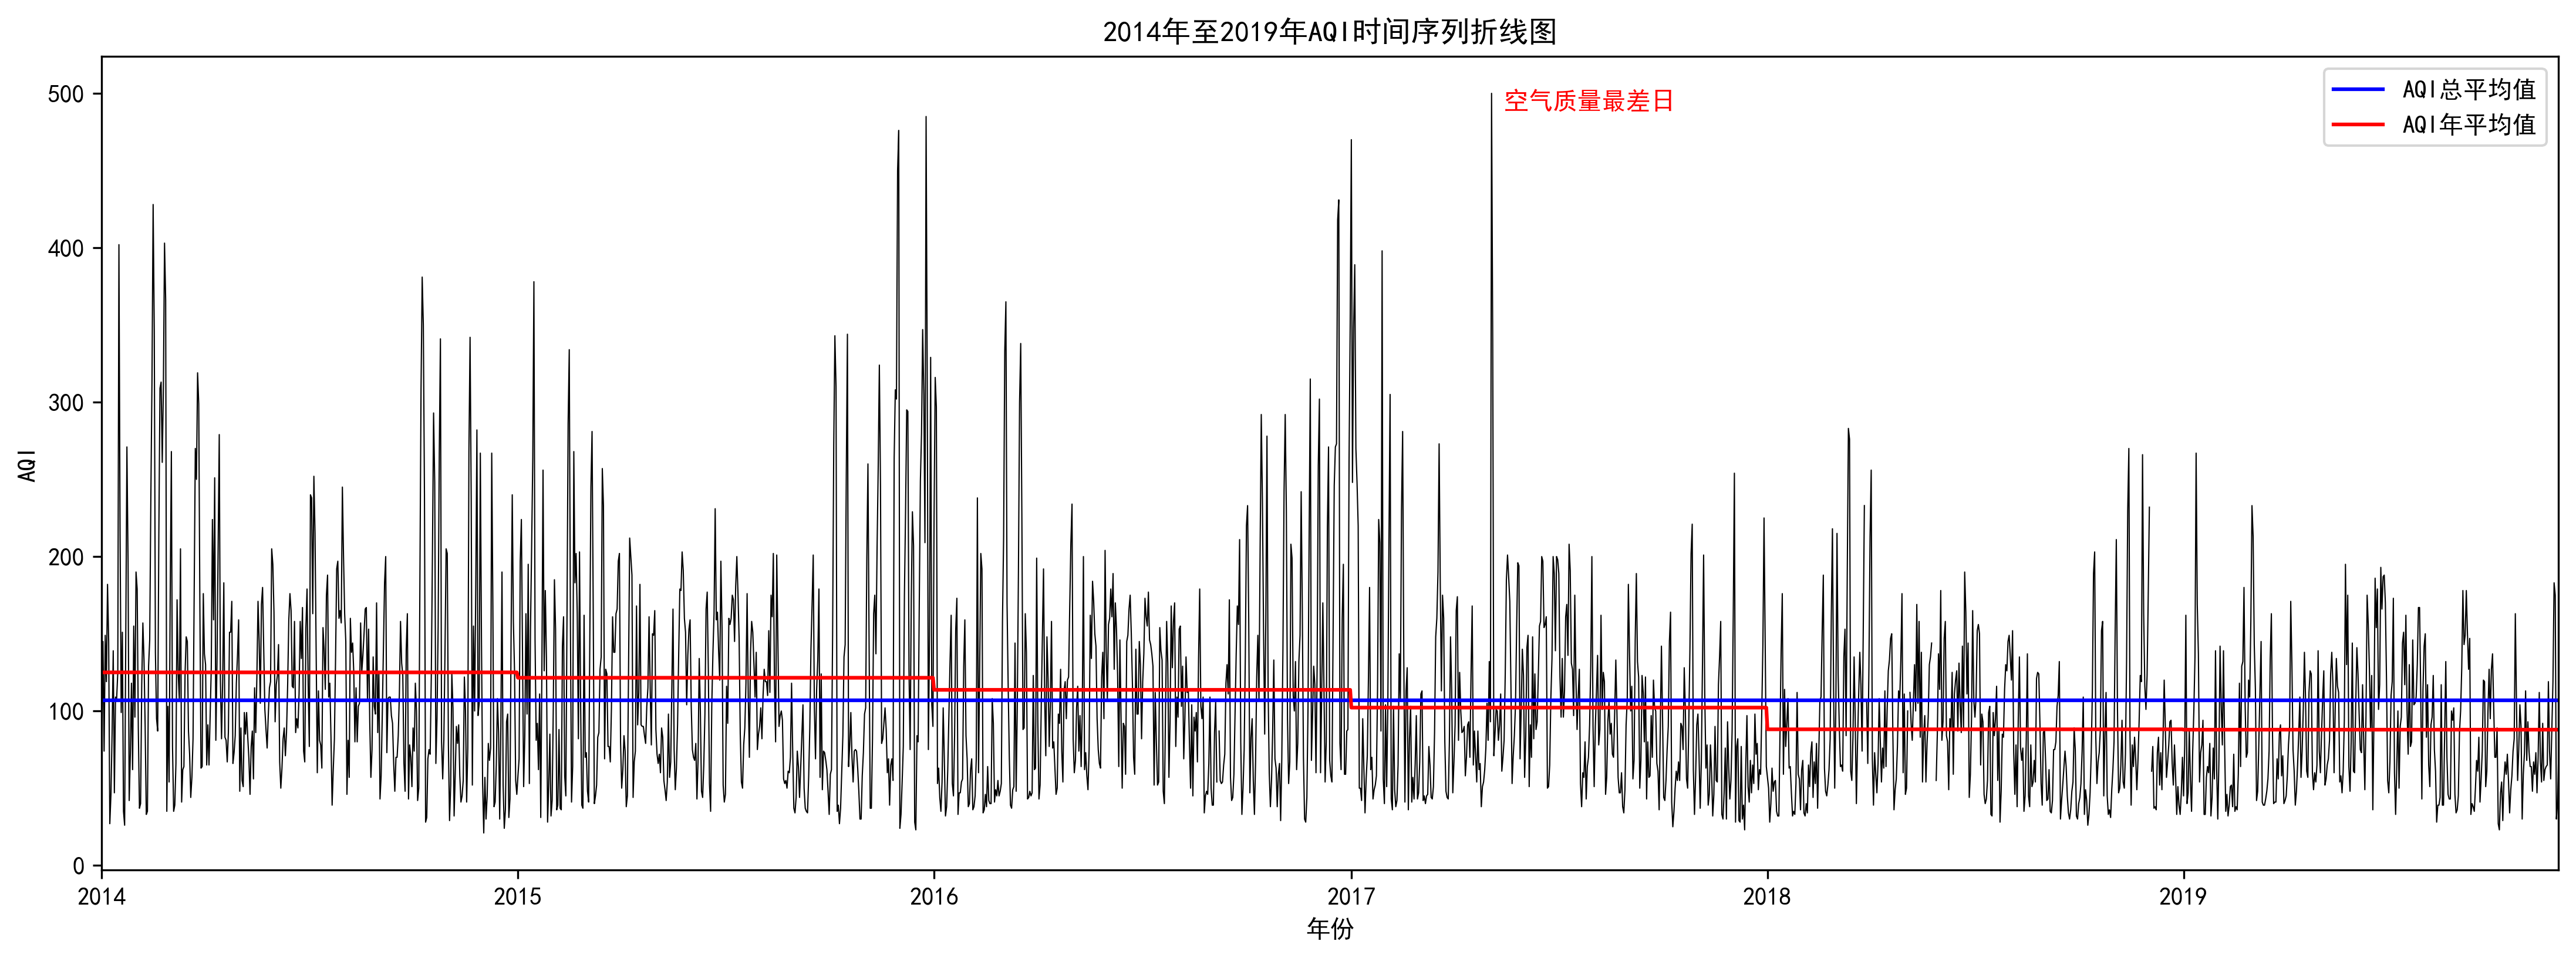

In [42]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 读取数据
PATH = Path.cwd()  # 数据路径
df = pd.read_excel(PATH / "北京市空气质量数据.xlsx", header=0)
df = df.replace(0, np.NaN)  # 清理无效数据
df["日期"] = pd.to_datetime(df["日期"])  # 转换日期格式
df = df.set_index("日期")  # 将日期设置为索引

# 绘图
plt.figure(figsize=(18, 6), dpi=300)  # 创建高分画布
plt.plot(df["AQI"], "k-", linewidth=0.5)  # 绘制 AQI 折线图
plt.axhline(df["AQI"].mean(), color="b", linestyle="-", label="AQI总平均值")
AQI_mean = df["AQI"].groupby(df.index.year).mean()  # 计算年平均值
df["年平均值"] = df.index.year.map(AQI_mean)  # 添加年平均值列
plt.plot(df["年平均值"], "r-", label="AQI年平均值")  # 绘制年平均值折线图
plt.title("2014年至2019年AQI时间序列折线图")
plt.xlabel("年份")
plt.ylabel("AQI")
plt.xlim(df.index[0], df.index[-1])  # 设置 x 轴范围避免两侧空白
plt.legend(loc="best")  # 设置图例
plt.text(df["AQI"].idxmax(), df["AQI"].max() - 10, " 空气质量最差日", color="r")
plt.show()


### AQI 的分布特征及相关性分析程序代码


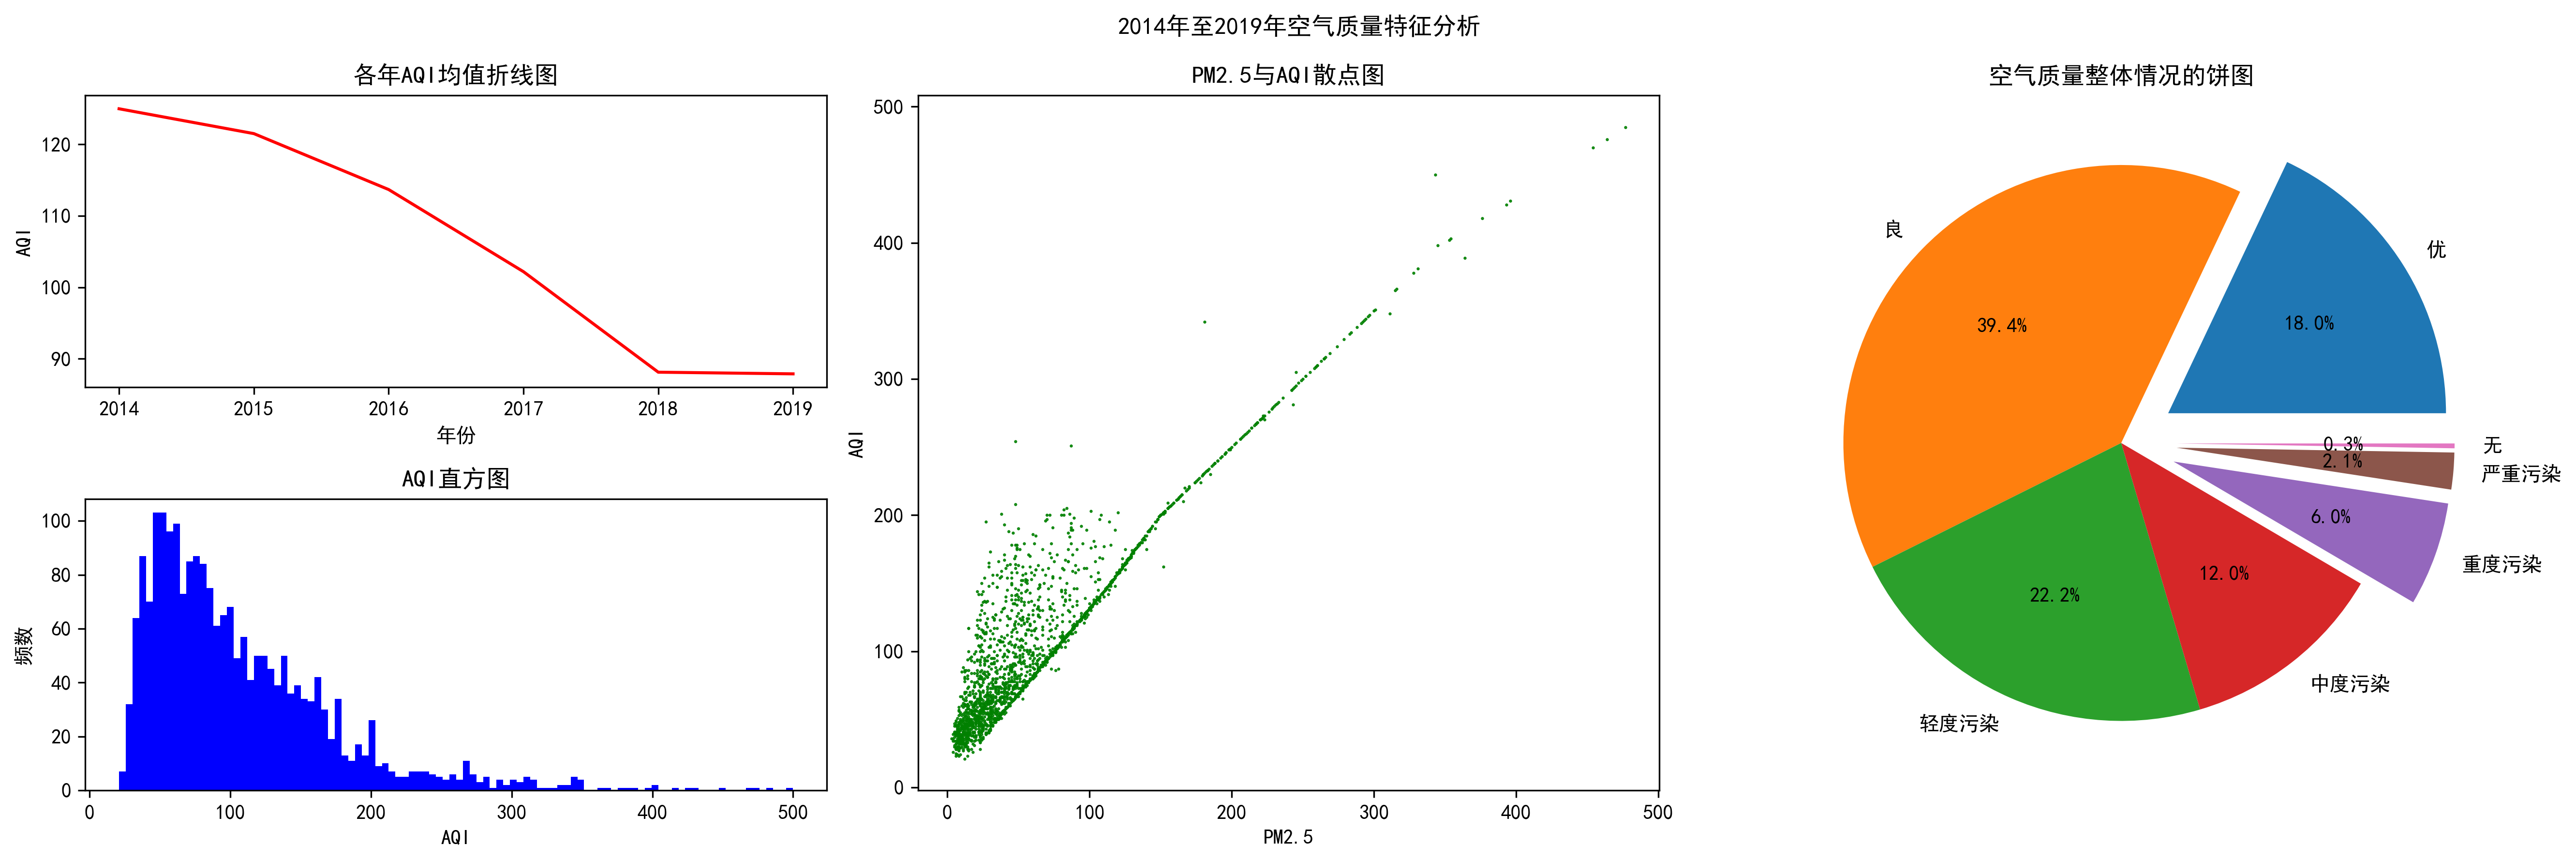

In [43]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 读取数据
PATH = Path.cwd()  # 数据路径
df = pd.read_excel(PATH / "北京市空气质量数据.xlsx", header=0)
df = df.replace(0, np.NaN)  # 清理无效数据
df["日期"] = pd.to_datetime(df["日期"])  # 转换日期格式
df = df.set_index("日期")  # 将日期设置为索引

# 创建高分画布
plt.figure(figsize=(18, 6), dpi=300)  

# 折线图
plt.subplot(2, 3, 1)
plt.plot(AQI_mean, "r-")
plt.title("各年AQI均值折线图")
plt.xlabel("年份")
plt.ylabel("AQI")

# 直方图
plt.subplot(2, 3, 4)
plt.hist(df["AQI"], bins=100, color="b")
plt.title("AQI直方图")
plt.xlabel("AQI")
plt.ylabel("频数")

# 散点图
plt.subplot(1, 3, 2)
plt.scatter(df["PM2.5"], df["AQI"], 0.25, "g")
plt.title("PM2.5与AQI散点图")
plt.xlabel("PM2.5")
plt.ylabel("AQI")

# 饼图
plt.subplot(1, 3, 3)
# 获取所有分级名称并按照 AQI 排序
level_list = df.groupby("质量等级").first().sort_values(by="AQI").index
# 按顺序列出各分级天数
level_count = df["质量等级"].value_counts().reindex(level_list)
# 设置 explode 参数，使优和最差三个分级突出
explode = [0.2 if i == "优" or i in level_list[-3:] else 0 for i in level_list]
plt.pie(level_count, explode=explode,
        labels=level_count.index, autopct="%1.1f%%")
plt.title("空气质量整体情况的饼图")
plt.suptitle("2014年至2019年空气质量特征分析")

plt.tight_layout()  # 设置所有子图的间距
plt.show()
